# 네이버 영화 리뷰 스크래핑~
https://movie.naver.com/

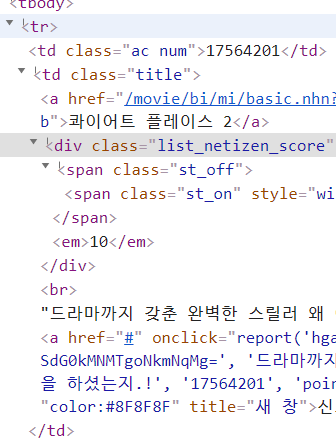

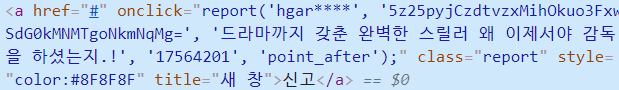

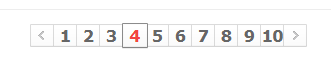


다음 페이지를 url 변경으로도 가능하지만, 밑에 > 화살표를 누르면 계속 다음 페이지를 가는 것을 알수 있다. 

In [60]:
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import quote
import pandas as pd

def get_movie_reviews(mcode, page_num=10):
    
    url='https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword='+ str(mcode) +'&target=after'
    df = pd.DataFrame(columns=('Title', 'Score', 'Review'))
    idx = 0 
    
    for _ in range(0, page_num):
        movie_page = urllib.request.urlopen(url).read()
        movie_page_soup = BeautifulSoup(movie_page, 'html.parser')
        review_list = movie_page_soup.find_all('td', {'class':'title'})
        for review in review_list:
            title = review.find('a', {'class': 'movie color_b'}).get_text()
            score = review.find('em').get_text()
            review_text = review.find('a', {'class':'report'}).get('onclick').split(',')[2]
            df.loc[idx] = [title, score, review_text]
            idx += 1
            print("#", end="")
        try:
            url = 'https://movie.naver.com' + movie_page_soup.find('a', {'class':'pg_next'}).get('href')
        except:
            break
    return df

In [61]:
movie_df = get_movie_reviews(189368)

####################################################################################################

In [62]:
# movie_df

In [63]:
titanic_df= get_movie_reviews(18847, 10)
# titanic_df

####################################################################################################

# 현재 상영작 평점 스크래핑

## 상영중인 mcode 가져오기

In [64]:
url = 'https://movie.naver.com/movie/point/af/list.nhn'
naver_movie = urllib.request.urlopen(url).read()
soup = BeautifulSoup(naver_movie, 'html.parser')
select = soup.find('select', {'id':'current_movie'})
movies = select.find_all('option')

movies_dict = {}

for movie in movies[1:]:
    movies_dict[movie.get('value')] = movie.get_text()

# print(movies_dict)

## 각각의 리뷰 받아오기

In [66]:
movie_review_df = pd.DataFrame(columns=('Title', 'Score', 'Review'))
for mcode in movies_dict:
    try:
        df = get_movie_reviews(mcode, 1)
    except:
        pass
    movie_review_df = pd.concat([movie_review_df, df])
    
movie_review_df

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

,Title,Score,Review
0,크레센도,10,'흥미진진한 전개
1,크레센도,6,'큰 재미도 없고 드라마틱한 스토리도 아니라 살짝 지루합니다. 하지만 뻔한 결말이...
0,흩어진 밤,10,'어느 누구 한명의 잘못도 아닌데 모두가 흩어져야 하는 밤...'
1,흩어진 밤,10,'아이의 시선은 이렇게 또 다르다는 것'
0,발신제한,10,'전화 걸려오는 순간부터 끝나는 순간까지 지창욱배우의 목소리 연기와 조우진배우의 ...
...,...,...,...
5,돌아오지 않는 강,10,'마릴린 먼로의 기타연주와 노래는 아직도 잊쳐지지 않는다....'
6,돌아오지 않는 강,10,'이 영화가 1950년대에 나왔음을 주의해야 한다.아이를 지키려는 사내의 집념을 ...
7,돌아오지 않는 강,1,'막 찍어내던 40년대 대량생산 규격'
8,돌아오지 않는 강,10,'이거 유명하지않나..'
